In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
!pip install -q -U easydl
from easydl import clear_output
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

import time
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
X = pd.read_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/X_train.csv", header=None)
y = pd.read_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/y_train.csv", header=None)
X_val = pd.read_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/X_val.csv", header=None)
y_val = pd.read_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/y_val.csv", header=None)
X_test = pd.read_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/X_test.csv", header=None)

In [67]:
from sklearn import datasets, linear_model, svm

def scv_classifier(X, y, X_val, y_val, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    y_train = np.array(y).ravel()
    X_val = scaler.transform(X_val)
    y_val = np.array(y_val).ravel()

    X_test = scaler.transform(X_test)

    pca = PCA(n_components=32, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    
    svc = svm.SVC(C=2.0)
    svc.fit(X_train, y_train)

    y_pred_val = svc.predict(X_val)
    y_pred_test = svc.predict(X_test)
    print(f1_score(y_val, y_pred_val, average='weighted'))

    return y_pred_val, y_pred_test

In [68]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def Voting_RF_ETC_KNN(X, y, X_val, y_val, X_test):
    pca = PCA(n_components=35, random_state=42)
    X_train = pca.fit_transform(X)
    X_val = pca.transform(X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf_rf = RandomForestClassifier(n_estimators=160, criterion='gini', min_samples_leaf=1, max_features='auto',
                                    min_samples_split=2, random_state=0)

    clf_etc = ExtraTreesClassifier(criterion='gini', max_features='auto', random_state=0)

    clf_knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', leaf_size=5, algorithm='auto', p=1)

    clf_rf.fit(X_train, y_train)
    clf_etc.fit(X_train, y_train)
    clf_knn.fit(X_train, y_train)

    eclf1 = VotingClassifier(estimators=[('rf', clf_rf), ('etc', clf_etc), ('knn', clf_knn)], voting='hard')
    eclf1.fit(X_train, y_train)

    y_pre_voting = eclf1.predict(X_val)

    f1_hard_voting = f1_score(y_val, y_pre_voting, average='weighted')

    print("Hard Voting for f1 (weighted) socre:  ", f1_hard_voting)

    X_test = pca.transform(X_test)
    X_test = min_max_scaler.transform(X_test)
    y_test_voting = eclf1.predict(X_test)

    return y_pre_voting,y_test_voting

In [69]:
from sklearn.linear_model import LogisticRegression


def lr_classfier(X, y, X_val, y_val, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=65, random_state=0)

    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf = LogisticRegression(C=10.1, solver='newton-cg')

    clf.fit(X_train, y_train)

    pred_val_y = clf.predict(X_val)
    pred_test_y = clf.predict(X_test)

    print('f1_score is :', f1_score(y_val, pred_val_y, average='weighted'))

    return pred_val_y, pred_test_y

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def ada_classifier(X, y, X_val, y_val, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    y_train = np.array(y).ravel()
    X_val = scaler.transform(X_val)
    y_val = np.array(y_val).ravel()
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=58, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)

    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=150)
    clf.fit(X_train, y_train)
    
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)

    print("ada_classifier = ",f1_score(y_val, y_pred_val, average='weighted'))
    return y_pred_val, y_pred_test

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

def Bagging_n_extraTree(X, y, X_val, y_val, X_test):
    
    pca = PCA(n_components=35, random_state=42)
    # random_state=42
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    bagging_model = BaggingClassifier(
        base_estimator= ExtraTreeClassifier(criterion = 'entropy',max_features = 'auto',random_state=0),
        n_estimators = 170,
        max_samples = 6400,
        max_features = 34,
        random_state = 20
    )
    
    bagging_model.fit(X_train, y_train )
    y_pred_bag = bagging_model.predict(X_val)
    
    f1_bag= f1_score(y_val, y_pred_bag, average='weighted')
    print('f1 score ---Bagging_eTree:', f1_bag)

    X_test = pca.transform (X_test)
    X_test = min_max_scaler.transform(X_test)
    y_test_bag = bagging_model.predict(X_test)
  
    return y_pred_bag, y_test_bag

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoosting(X, y, X_val, y_val, X_test):
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(X)
    Xval = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=65, random_state=0)
    Xtrain = pca.fit_transform(Xtrain)
    Xval = pca.transform(Xval)
    X_test = pca.transform(X_test)

    clf = GradientBoostingClassifier(n_estimators=150)
    clf.fit(Xtrain, y)
    
    pred_y_val = clf.predict(Xval)
    pred_y_test = clf.predict(X_test)

    f1 = f1_score(y_val, pred_y_val, average='weighted')
    print("f1_score(weighted)of === GradientBoosting: ",f1)

    return pred_y_val, pred_y_test

In [73]:
from lightgbm import LGBMClassifier

def Light_gbm(X, y, X_val, y_val, X_test):
    
    pca = PCA(n_components=40, random_state=42)
    # random_state=42
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel() 

    gbm = LGBMClassifier(
       num_leaves=31,
        max_depth = -1, 
        
        learning_rate=0.1,
        n_estimators= 120, 
        silent = True,
        objective = 'multiclass' )
    
    gbm.fit(X_train,y_train)

    y_pred_gbm = gbm.predict(X_val, num_iteration=46)
    f1_gbm = f1_score(y_val, y_pred_gbm, average='weighted')
    print("f1_score(weighted)of === gbm: ",f1_gbm)

    X_test = pca.transform (X_test)
    X_test = min_max_scaler.transform(X_test)
    y_test_gbm = gbm.predict(X_test)

    return y_pred_gbm, y_test_gbm

In [74]:
def KNN_classifier(X, y, X_val, y_val, X_test):
       
    pca = PCA(n_components=35, random_state= 42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    #KNN -classifier
    clf_knn = KNeighborsClassifier(
            n_neighbors = 1, 
            weights = 'uniform', 
            leaf_size =5,
            algorithm = 'auto',
            p=1)
    
    clf_knn.fit(X_train, y_train)
    y_pred_knn= clf_knn.predict(X_val)
    f1_knn= f1_score(y_val, y_pred_knn, average='weighted')

    print('f1 score --KNN:', f1_knn)
    print()

    X_test = pca.transform (X_test)
    X_test = min_max_scaler.transform(X_test)
    y_test_KNN = clf_knn.predict(X_test)

    return y_pred_knn,y_test_KNN

In [75]:
def RF_n_ExtraTree_classifier(X, y, X_val, y_val, X_test):

    pca = PCA(n_components=35, random_state= 42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    # # # step3, normalization 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    y_train = np.array(y).ravel()
    X_val = scaler.transform(X_val)
    y_val = np.array(y_val).ravel()

    # Random forest - classifier
    clf_rf = RandomForestClassifier(n_estimators = 160, 
                      criterion='gini', 
                      min_samples_leaf= 1,
                      max_features='auto',
                      min_samples_split=2, 
                      random_state=0)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_val)
    f1= f1_score(y_val, y_pred_rf, average='weighted')
    print("f1_score_Randomforest:   ",f1)
    print()

     # ExtraTree - classifier
    clf_etc = ExtraTreesClassifier(random_state=0, 
                                  criterion = 'gini',
                                   max_features = 'auto'
                                  )
    clf_etc.fit(X_train, y_train)
    y_pred_etc = clf_etc.predict(X_val)

    f1_etc= f1_score(y_val, y_pred_etc, average='weighted')
    print("f1_score___ExtraTress Classifier:   ",f1_etc)
    print()

    X_test = pca.transform (X_test)
    X_test = scaler.transform(X_test)
    
    y_test_RF = clf_rf.predict(X_test)
    y_test_ETC = clf_etc.predict(X_test)

    return  y_pred_rf, y_test_RF, y_pred_etc, y_test_ETC
    

In [76]:
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


def xgboost(X, y, X_val, y_val, X_test):
    pca = PCA(n_components = 40, random_state=42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)
    X_train = np.array(X_train)
    X_val = np.array(X_val)

    y_train =np.array(y).ravel()
    y_val =np.array(y_val).ravel()

    # 归一化
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    Validation = True
    if Validation == True:
        model = xgb.XGBClassifier(
                max_depth=7,
                learning_rate=0.05,
                n_estimators=1000,
 
                silent=True,
                objective='multi:softmax',
        )

        model.fit(X_train,y_train)
        y_pred_xgb = model.predict(X_val)

        f1_xgb = f1_score(y_val, y_pred_xgb, average='weighted')
        print("f1_score(weighted)___xgboost",f1_xgb)

        X_test = pca.transform (X_test)
        X_test = min_max_scaler.transform(X_test)
        y_test_xgb = model.predict(X_test)

    return y_pred_xgb, y_test_xgb

# **Feature Engineering** 

### 1 Normalization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)
new_y = np.zeros((y.values.shape[0], 6), dtype=int)
for i in range(y.values.shape[0]):
  new_y[i, int(y.values.ravel()[i]) - 1] = 1

### 2 Bottleneck Encoder

In [78]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.activations import relu, swish
from tensorflow.keras.metrics import AUC
# !pip install -q -U keras-tuner
# import kerastuner as kt
import tensorflow as tf

In [79]:
def AutoEndcoder(input_dim, output_dim, noise=0.05):
    i = Input(input_dim)
    encoded = BatchNormalization()(i)
    encoded = GaussianNoise(noise)(encoded)

    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dropout(0.15)(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dropout(0.15)(encoded)
    
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dropout(0.15)(decoded)
    decoded = Dense(input_dim, name='decoded')(decoded) 
    x = Dense(64, activation='relu')(decoded)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(output_dim, activation='sigmoid', name='label_output')(x)

    encoder = Model(inputs=i, outputs=encoded)
    autoencoder = Model(inputs=i, outputs=[decoded, x]) 

    autoencoder.compile(optimizer=Adam(0.01), loss={'decoded':'mse', 'label_output':'binary_crossentropy'})

    return autoencoder, encoder

In [80]:
TRAIN = False
SEED = 20
tf.random.set_seed(SEED)
autoencoder, encoder = AutoEndcoder(X_s.shape[-1], new_y.shape[-1], noise=0.05)
if TRAIN:
    autoencoder.fit(X_s, (X_s, new_y),
              epochs=1000,
              batch_size=4096, 
              validation_split=0.2,
              callbacks=[EarlyStopping('val_loss', patience=10, restore_best_weights=True)])
    encoder.save_weights('/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/encoder.hdf5')
else:
    encoder.load_weights('/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/encoder.hdf5')
encoder.trainable = False
print("SAVE/LOAD FINISH")

SAVE/LOAD FINISH


# **Model Design and Training**

In [81]:
from sklearn.metrics import f1_score
def f1(ytruth, y_pred, average='macro'):
  return f1_score(ytruth, np.argmax(np.array(y_pred), axis=1) + 1, average=average)

def MLP_Model(input_dim, output_dim, encoder, hidden_layers, lr=0.001, smooth=0.1):
    inputs = Input(input_dim)
    x = encoder(inputs)  
    x = Concatenate()([x, inputs]) 
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    
    for layer in hidden_layers:
        x = Dense(layer)(x)
        x = BatchNormalization()(x)
        x = Lambda(swish)(x)
        x = Dropout(0.2)(x)
    
    x = Dense(output_dim, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=x)
    
    model.compile(optimizer=Adam(lr),
                  loss=BinaryCrossentropy(label_smoothing=smooth),
                  metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

In [82]:
def ensemble(prediction):
  df = pd.DataFrame(np.stack(prediction).T)
  maxCount = np.zeros(df.shape[0])
  for i in range(df.shape[0]):
      line = df.iloc[i, :]
      count = defaultdict(int)
      for j in range(line.shape[0]):
          count[line[j]] += 1
      maxList = sorted(list(count.items()), key=lambda x: x[1], reverse=True)
      maxValue = maxList[0][0]
      maxCount[i] = maxValue
  return maxCount

In [83]:
from sklearn.model_selection import KFold

TEST = True
TRAIN = False

SEED = 20
tf.random.set_seed(SEED)

hidden_layers = [512, 2048, 256, 256, 32, 32, 32]
batchSize = 2048
learningRate = 0.002
laplaceSmoothing = 0.05

if TEST:
  modelList = []
  scoreList = []
  kf = KFold(shuffle=True, random_state=0)
  i = 1
  for train_index, test_index in kf.split(X_s):
    print(f"============= THE {i}-th FOLD ==================")
    i += 1
    Xtrain, Xtest = X_s[train_index], X_s[test_index]
    ytrain = new_y[train_index]
    ytest = y.values[test_index]

    Xtrain_not_s, Xtest_not_s = X.values[train_index], X.values[test_index]
    ytrain_not_s = y.values[train_index]

    mlp = MLP_Model(Xtrain.shape[1], ytrain.shape[1], encoder, hidden_layers, lr=learningRate, smooth=laplaceSmoothing)
    mlp.fit(Xtrain, ytrain, validation_split=0.1, epochs=1000, batch_size=batchSize, callbacks=[EarlyStopping('val_auc', mode='max', patience=10, restore_best_weights=True)])

    ypred_network = mlp(Xtest)
    y_pred_network = np.argmax(np.array(ypred_network), axis=1) + 1
    y_pred_KNN, _ = KNN_classifier(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_bag, _ = Bagging_n_extraTree(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_GB, _ = GradientBoosting(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_RF, _, y_pred_ETC, _ = RF_n_ExtraTree_classifier(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_XGB, _ = xgboost(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_GBM, _ = Light_gbm(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_vote, _ = Voting_RF_ETC_KNN(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_lr, _ = lr_classfier(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_ada, _ = ada_classifier(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)
    y_pred_svc, _ = scv_classifier(Xtrain_not_s, ytrain_not_s, Xtest_not_s, ytest, X_test)

    predictionList = [y_pred_network, y_pred_GB, y_pred_KNN, y_pred_bag, y_pred_RF, y_pred_ETC, y_pred_XGB, y_pred_GBM, y_pred_vote, y_pred_lr, y_pred_ada, y_pred_svc]
    prediction = ensemble(predictionList)
    score = f1_score(ytest.ravel(), prediction, average='weighted')

    scoreList.append(score)
    modelList.append(mlp)
    clear_output()
  print(f"f1_score = {np.mean(scoreList)}")
  print(f"f1_score list is {scoreList}")
  print("TEST FINISH")
elif TRAIN:
  mlp = MLP_Model(X_s.shape[1], new_y.shape[1], encoder, hidden_layers, lr=learningRate, smooth=laplaceSmoothing)
  mlp.fit(X_s, new_y, validation_split=0.1, epochs=1000, batch_size=batchSize, callbacks=[EarlyStopping('val_auc', mode='max', patience=10, restore_best_weights=True)])
  mlp.save_weights(f'/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/mlp.hdf5')
  mlp.trainable = False
  print("TRAIN FINISH")
else:
  mlp = MLP_Model(X_s.shape[1], new_y.shape[1], encoder, hidden_layers, lr=learningRate, smooth=laplaceSmoothing)
  mlp.load_weights('/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/mlp.hdf5')
  mlp.trainable = False
  print("LOAD FINISH")

f1_score = 0.9962833478655793
f1_score list is [0.9952066214497387, 0.9945983895553285, 0.9970052460629245, 0.9982013768182298, 0.9964051054416748]
TEST FINISH


# **Test**

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
TEST = True
if not TEST:
  y_val_pred = mlp(X_val_s, training=False)
  y_pred_network = np.argmax(np.array(y_val_pred), axis=1) + 1

  y_pred_KNN, _ = KNN_classifier(X, y, X_val, y_val, X_test)
  y_pred_RF, _, y_pred_ETC, _ = RF_n_ExtraTree_classifier(X, y, X_val, y_val, X_test)
  y_pred_XGB, _ = xgboost(X, y, X_val, y_val, X_test)
  y_pred_GBM, _ = Light_gbm(X, y, X_val, y_val, X_test)
  y_pred_GB, _ = GradientBoosting(X, y, X_val, y_val, X_test)
  y_pred_bag, _ = Bagging_n_extraTree(X, y, X_val, y_val, X_test)
  y_pred_vote, _ = Voting_RF_ETC_KNN(X, y, X_val, y_val, X_test)
  y_pred_lr, _ = lr_classfier(X, y, X_val, y_val, X_test)
  y_pred_ada, _ = ada_classifier(X, y, X_val, y_val, X_test)
  y_pred_svc, _ = scv_classifier(X, y, X_val, y_val, X_test)
  
  predictionList = [y_pred_network, y_pred_GB, y_pred_KNN, y_pred_bag, y_pred_RF, y_pred_ETC, y_pred_XGB, y_pred_GBM, y_pred_vote, y_pred_lr, y_pred_ada, y_pred_svc]
  prediction = ensemble(predictionList)
  print()
  print()
  f1_micro = f1_score(y_val.values.ravel(), prediction, average='micro')
  print("f1_score (micro) =", f1_micro)
  f1_macro = f1_score(y_val.values.ravel(), prediction, average='macro')
  print("f1_score (macro) =", f1_macro)
  f1_weighted = f1_score(y_val.values.ravel(), prediction, average='weighted')
  print("f1_score (weighted) =", f1_weighted)
  print()
  print(classification_report(y_val.values.ravel(), np.argmax(np.array(y_val_pred), axis=1) + 1))
  print(confusion_matrix(y_val.values.ravel(), np.argmax(np.array(y_val_pred), axis=1) + 1))

In [91]:

y_pred_network = mlp(X_test_s, training=False)
y_pred_network = np.argmax(np.array(y_pred_network), axis=1) + 1
_, y_pred_KNN = KNN_classifier(X, y, X_val, y_val, X_test)
_, y_pred_RF, _, y_pred_ETC = RF_n_ExtraTree_classifier(X, y, X_val, y_val, X_test)
_, y_pred_XGB = xgboost(X, y, X_val, y_val, X_test)
_, y_pred_GBM = Light_gbm(X, y, X_val, y_val, X_test)
_, y_pred_GB = GradientBoosting(X, y, X_val, y_val, X_test)
_, y_pred_bag = Bagging_n_extraTree(X, y, X_val, y_val, X_test)
_, y_pred_vote = Voting_RF_ETC_KNN(X, y, X_val, y_val, X_test)
_, y_pred_lr = lr_classfier(X, y, X_val, y_val, X_test)
_, y_pred_ada = ada_classifier(X, y, X_val, y_val, X_test)
_, y_pred_svc = scv_classifier(X, y, X_val, y_val, X_test)

predictionList_ = [y_pred_network, y_pred_GB, y_pred_KNN, y_pred_bag, y_pred_RF, y_pred_ETC, y_pred_XGB, y_pred_GBM, y_pred_vote, y_pred_lr, y_pred_ada, y_pred_svc]
prediction_ = ensemble(predictionList)

prediction_ = pd.DataFrame(prediction_)
prediction_.to_csv("/content/drive/MyDrive/9417_nn/MLinTheUnknown-Data/y_test.csv", header=None, index=False)


f1 score --KNN: 0.9946066135727359

f1_score_Randomforest:    0.9953174101825997

f1_score___ExtraTress Classifier:    0.9956795986746309

f1_score(weighted)___xgboost 0.9946039415911787
f1_score(weighted)of === gbm:  0.9928051785721448
f1_score(weighted)of === GradientBoosting:  0.9899169897371533
f1 score ---Bagging_eTree: 0.9949627252393135
Hard Voting for f1 (weighted) socre:   0.9956795986746309
f1_score is : 0.9888487024317972
ada_classifier =  0.9920880514108713
0.9827454602456348


In [92]:
ypred = pd.DataFrame(prediction_)
ypred

,0
0,1.0
1,2.0
2,6.0
3,5.0
4,2.0
...,...
2777,2.0
2778,6.0
2779,6.0
2780,5.0


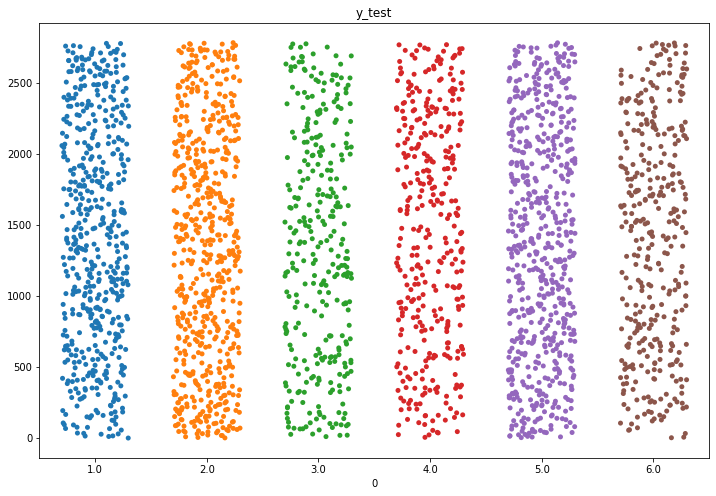

In [93]:
plt.figure(figsize=(12, 8))
# sns.violinplot(x="labels", y="values", data=data_cut, inner=None)
plt.title("y_test")

# sns.boxplot(x="labels", y="values", data=data_cut, whis=np.inf)
sns.stripplot(x=ypred[0], y=ypred.index, data=ypred,jitter=0.3)

In [ ]:


# import numpy as np
# from sklearn.preprocessing import StandardScaler
# import time

# ### Step1, ####feature selection, including training sets and validation sets
# print("Start : %s\n" % time.ctime())

# from sklearn.decomposition import PCA, IncrementalPCA
# from sklearn.pipeline import make_pipeline


# pca = PCA(n_components=11)
# X_train = pca.fit_transform (X)
# X_val = pca.transform (X_val)


# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# y_train = np.array(y).ravel()

# X_val = scaler.transform(X_val)
# y_val = np.array(y_val).ravel()



print("End : %s" % time.ctime())

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

# knn_clf = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', leaf_size =5, p=1)
# knn_clf.fit(X_train, y_train)

# y_val_pred_ = knn_clf.predict(X_val)

# f1_kf = f1_score(y_val, y_val_pred_, average='weighted')

# print(classification_report(y_val,  y_val_pred_))
# print()
# print('f1 score--by--KNN:', f1_kf)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

# clf_rf = RandomForestClassifier(n_estimators = 140, criterion='entropy', min_samples_leaf= 1, random_state= 0)
# clf_rf.fit(X_train, y_train)

# y_val_pred_rf = clf_rf.predict(X_val)

# f1_RF = f1_score(y_val, y_val_pred_rf, average='weighted')

# print(classification_report(y_val,  y_val_pred_rf))
# print()
# print("f1_score--by--RF:   ",f1_RF)